# Problem 1: Bayesian Inference

In [38]:
import numpy as np
import matplotlib.pyplot as plt

Assumptions:
The number of car accidents are independent in each rush hours.
The number of car accidents in one rush hour does not affect the number of car accidents in the next hour.
The average number of car accident remain unchange within the rush hours
Possion distribution may be a good fit

In [6]:
accidents=np.array([16,24,16,12,16,11,14,15,9,14,7])
mean_acct=np.mean(accidents)
sd_acct=np.std(accidents)

In [7]:
mean_acct

14.0

In [8]:
sd_acct

4.264014327112209

In [37]:
Poisson=lambda k,λ: (λ**k)*np.exp(-λ)/np.math.factorial(k)
Poisson=np.vectorize(Poisson)

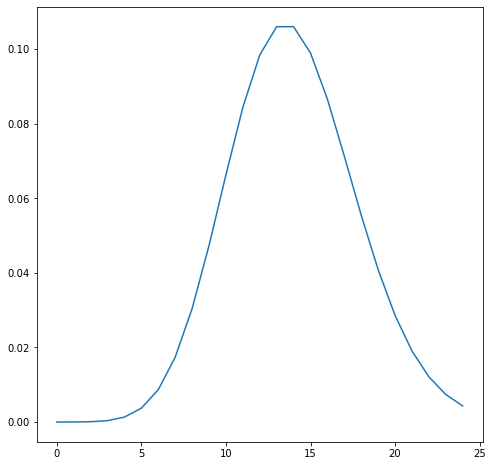

In [163]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(25),Poisson(np.arange(25),mean_acct)) #Poisson distribution with λ = 14 (mean of the samples)
plt.show()

# Problem 2: zero-order Optimization

In [12]:
import lhsmdu

In [153]:
def Optim (n=100,P=100):
    N=list(range(1,n))
    g1=[]
    for i in range(1,len(N)+1):
        w=lhsmdu.sample(i,P) #sample [0,1]^N with N dimensions and P is # of samples
        wt=w.transpose()
        for j in range (0,P):
            g=[]
            g_cal=wt[j]*w[:,j]
            g=np.append(g,g_cal)
            g_min=min(g)
        g1=np.append(g1,g_min)
    return g1

    

In [155]:
G_100=Optim(n=100,P=100)

In [157]:
G_200=Optim(n=100,P=200)

In [158]:
G_400=Optim(n=100,P=400)

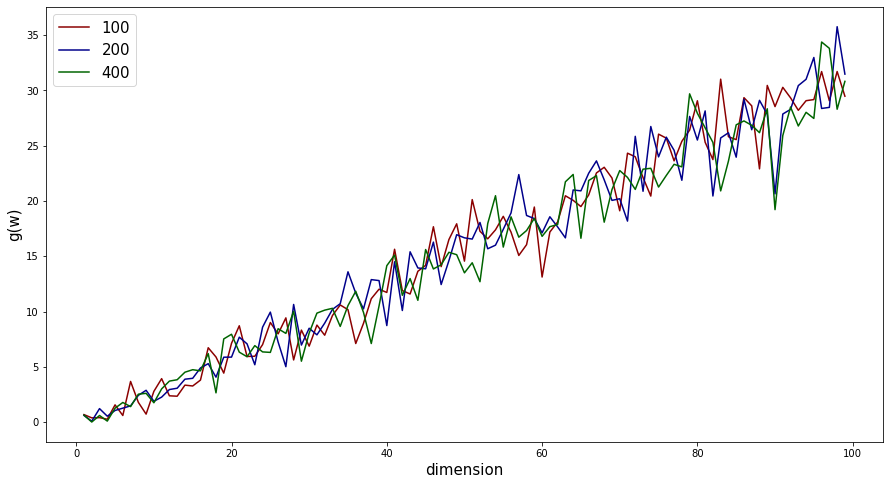

In [162]:
#Plot graph
plt.figure(figsize=(15,8))
plt.plot(N,G_100,c='darkred',label="100")
plt.plot(N,G_200,c='darkblue',label="200")
plt.plot(N,G_400,c='darkgreen',label="400")
plt.xlabel('dimension',fontsize=15)
plt.ylabel('g(w)',fontsize=15)
plt.legend(fontsize=15)
plt.show()

As N (dimensions) increase, the minimum value attained for each quardratic increase. However when P increase, its increase the running time, but there's not much difference between the minimum value attained for each quaratic.